# Exploratory Data Analysis (EDA)

## Import Library & load dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../dataset/HR-Employee-Attrition.csv")

# Drop kolom tidak informatif
drop_cols = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]
df.drop(columns=drop_cols, inplace=True)

# Encode target
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Distribusi Attrition

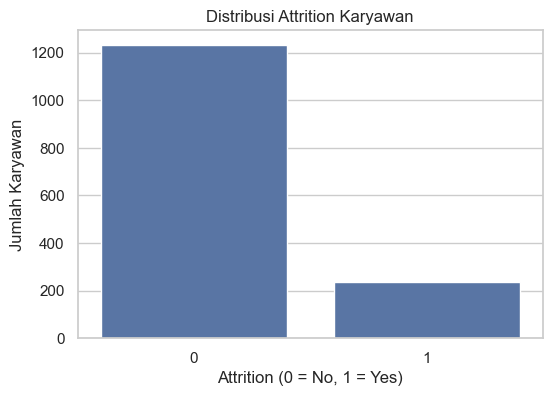

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Distribusi Attrition Karyawan")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Jumlah Karyawan")
plt.show()


Insight:
Mayoritas karyawan tidak mengalami attrition dan Dataset imbalanced ringan.

## Age vs Attrition

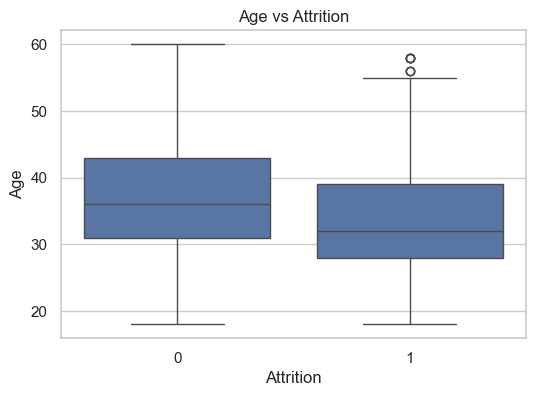

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="Age", data=df)
plt.title("Age vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.show()


Insight:
- Karyawan yang keluar cenderung lebih muda
- Usia muda → potensi turnover lebih tinggi

## Monthly Income vs Attrition

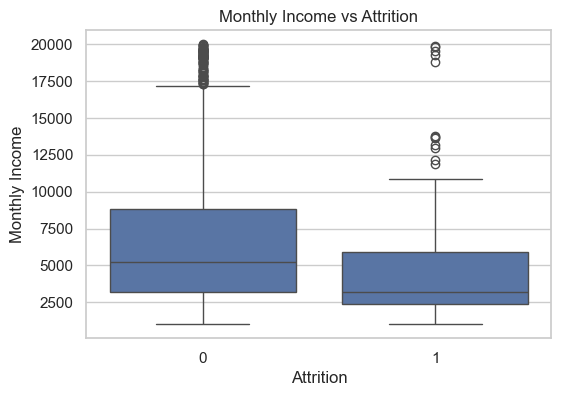

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


Insight:
- Karyawan dengan income lebih rendah lebih sering keluar dan
- Compensation strategy penting untuk retensi

## Job Satisfaction & Work-Life Balance

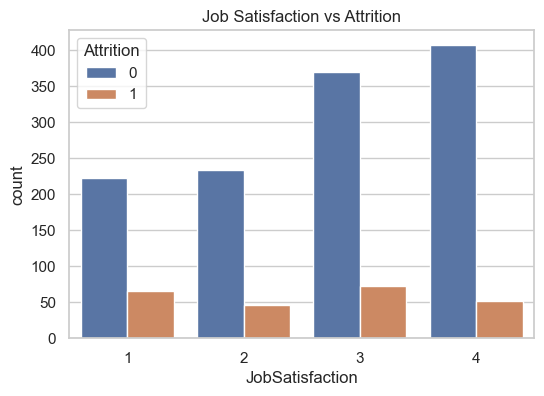

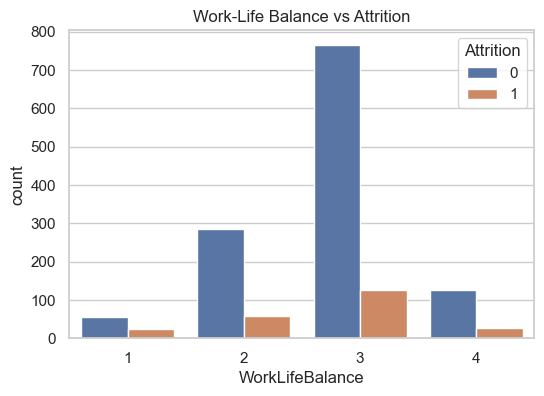

In [21]:
# Job satisfaction
plt.figure(figsize=(6,4))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()

# work balance
plt.figure(figsize=(6,4))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df)
plt.title("Work-Life Balance vs Attrition")
plt.show()



insigth:
- grafik pertama Kepuasan kerja rendah hingga attrition lebih tinggi
- lalu grafik kedua Work-life balance buruk hingga risiko resign meningkat

## Distance From Home vs Attrition

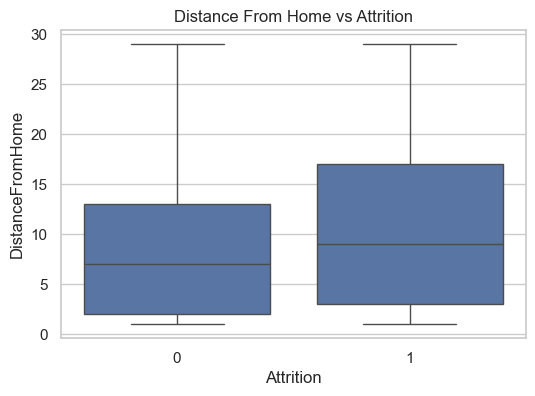

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="DistanceFromHome", data=df)
plt.title("Distance From Home vs Attrition")
plt.show()


Insight:
- Jarak rumah lebih jauh → risiko attrition meningkat
- Relevan untuk kebijakan WFH / lokasi kerja

## Heatmap Fitur Numerik

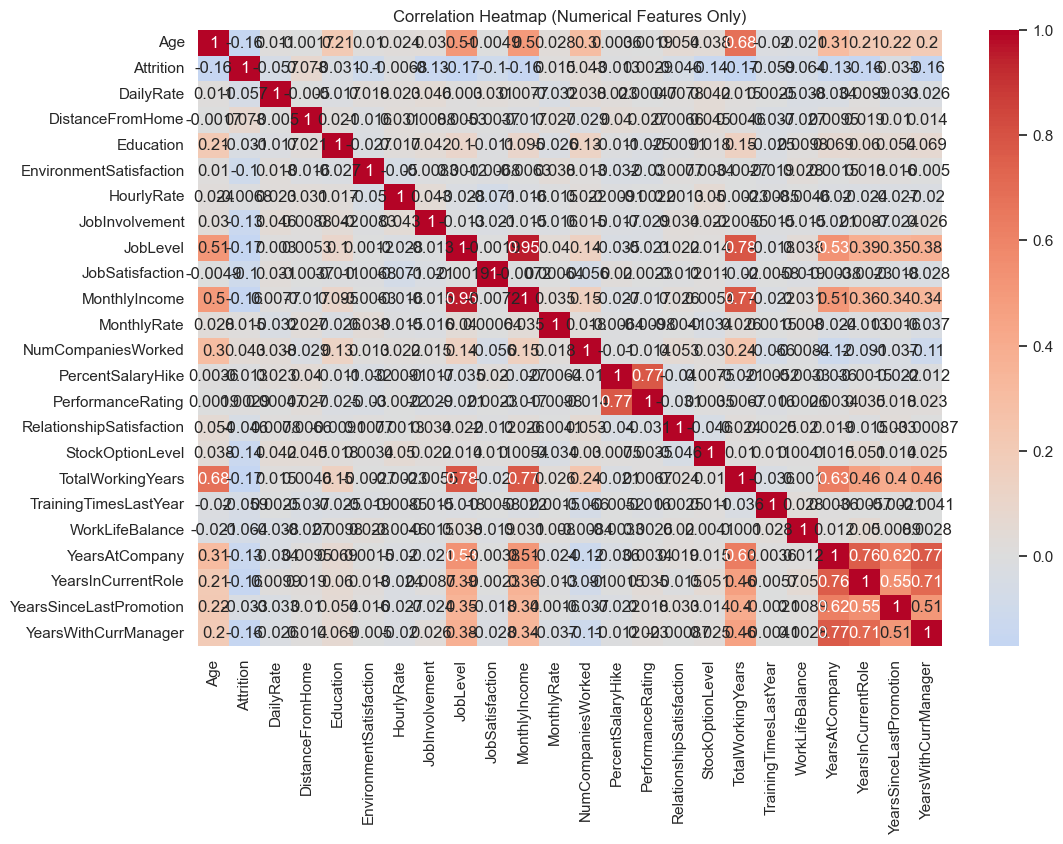

In [23]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


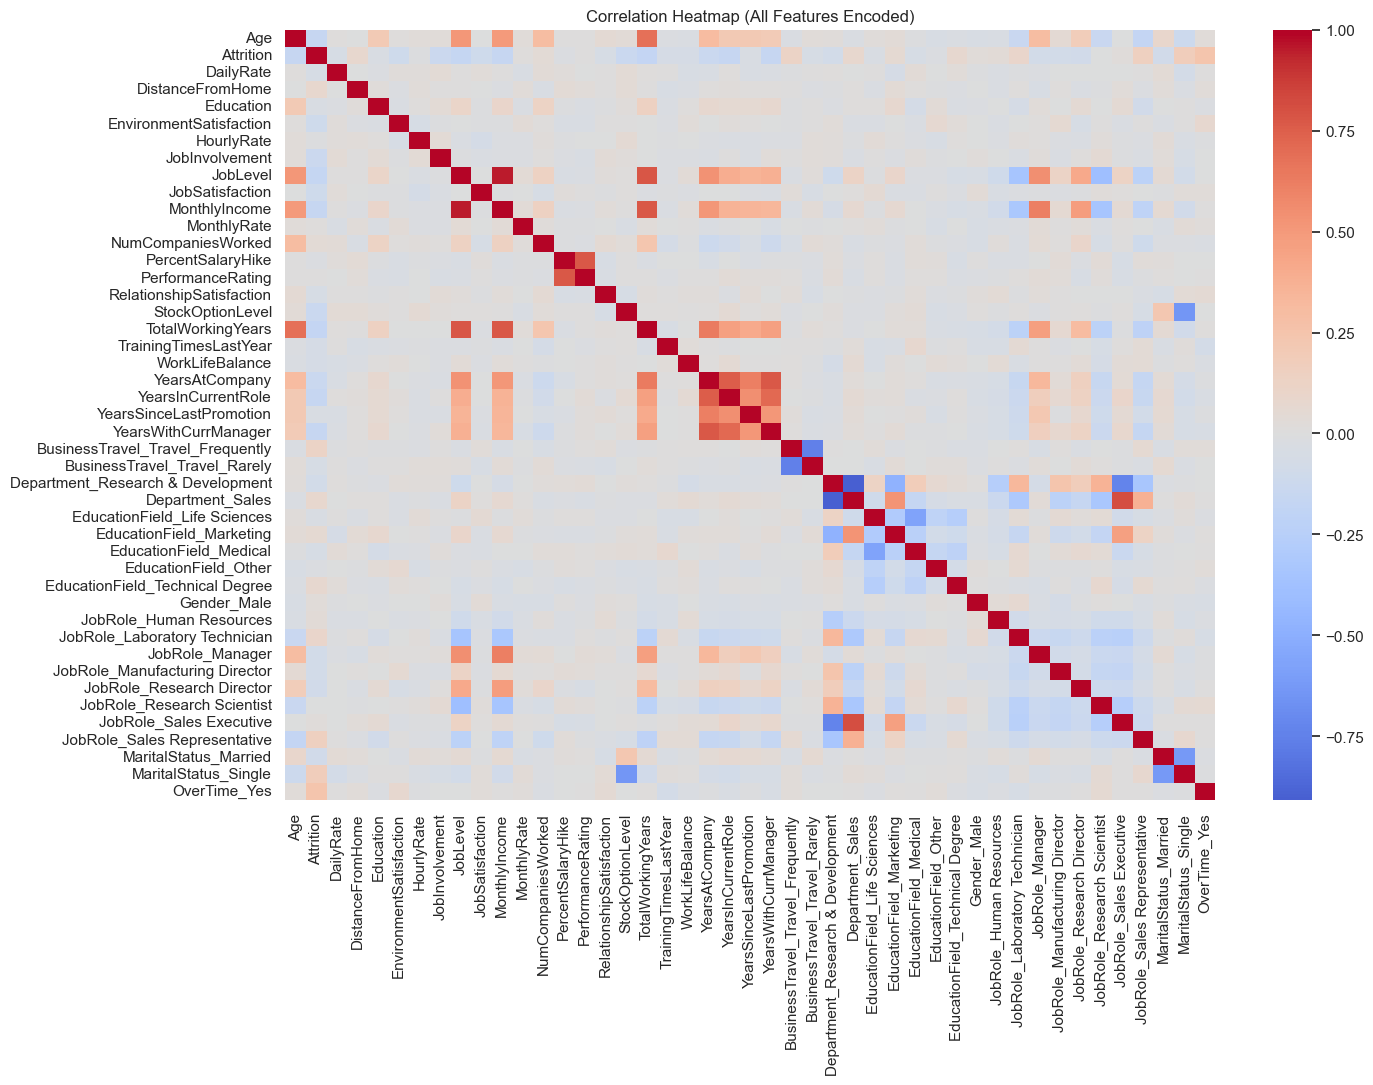

In [24]:
# Setelah One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()



INSIGHT UTAMA EDA 

1. Karyawan dengan kepuasan kerja dan work-life balance rendah
   memiliki risiko attrition lebih tinggi.
2. Faktor kompensasi (Monthly Income) berpengaruh signifikan
   terhadap keputusan karyawan untuk keluar.
4. Faktor jarak rumah ke kantor turut memengaruhi attrition.
5. Faktor demografis memiliki pengaruh lebih kecil dibanding faktor pekerjaan.

